In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
atypicality_tech_leap = pd.read_csv("./data/patents_with_atypicality_and_tech_leap.csv", index_col=0, dtype={"patent_id": str})
atypicality_tech_leap.head()

/var/folders/zx/x6hb1_p95p33hh3235qrnlqm0000gn/T/ipykernel_74711/110750114.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  atypicality_tech_leap = pd.read_csv("./data/patents_with_atypicality_and_tech_leap.csv", index_col=0, dtype={"patent_id": str})


,cpc_subclass_pairs,atypicality_score,cpc_subclasses,intersect_cpc_subclasses,union_cpc_subclasses,tech_leap
patent_id,,,,,,
10000000,[],NaN,{'G01S'},['G01S'],"['Y02A', 'G01S']",0.500000
10000001,"[('B29C', 'G05B')]",8.984207,"{'G05B', 'B29C'}",['B29C'],"['B29C', 'G05B']",0.500000
10000002,"[('B29C', 'B29D'), ('B29C', 'B29K'), ('B29C', ...",8.375340,"{'B32B', 'B29L', 'B29K', 'B60C', 'B29C', 'B29D'}","['B29C', 'B32B', 'B29K']","['B29C', 'Y10T', 'H05K', 'B29L', 'B60C', 'B29D...",0.666667
10000003,"[('B29C', 'B29D'), ('B29C', 'B29K'), ('B29C', ...",6.990229,"{'B29K', 'B29L', 'B29D', 'B29C'}","['B29C', 'B29L']","['B29C', 'B29D', 'B60K', 'B29K', 'B29L']",0.600000
10000004,"[('B29C', 'B29K'), ('B29C', 'B29L'), ('B29K', ...",6.239670,"{'B29K', 'B29L', 'B29C'}","['B29C', 'B29L']","['B29C', 'B29L', 'B65D', 'B65B', 'B32B', 'B29K']",0.666667


In [3]:
atypicality_tech_leap.shape[0]

7507819

In [5]:
fwd_citation_impact = pd.read_csv("./data/patent_with_fwd_citation_impact.csv", index_col=0, dtype={"patent_id": str})
fwd_citation_impact.head()

,fwd_cited_by_patents,forward_citations,fwd_cited_cpc_subclasses,fwd_cited_cpc_subclasses_entropy,fwd_citation_impact_score
patent_id,,,,,
10000000,"['10753736', '10845468', '10873738', '11092690...",13,"['G01B', 'G06T', 'G01S', 'H04N', 'G01S', 'G06N...",1.399631,18.195203
10000001,[],0,[],NaN,NaN
10000002,[],0,[],NaN,NaN
10000003,"['10668805', '11318832']",2,"['B29C', 'B60K', 'B29C', 'B60K']",0.693147,1.386294
10000004,[],0,[],NaN,NaN


In [6]:
fwd_citation_impact.shape[0]

7507819

In [16]:
# Distribution of Atypicality Scores
atypicality_tech_leap["atypicality_score"].describe(
    percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]
)

count    4.056170e+06
mean     8.093600e+00
std      1.987437e+00
min      4.489449e+00
5%       5.087011e+00
25%      6.627396e+00
50%      8.040293e+00
75%      9.427694e+00
95%      1.147098e+01
max      1.649518e+01
Name: atypicality_score, dtype: float64

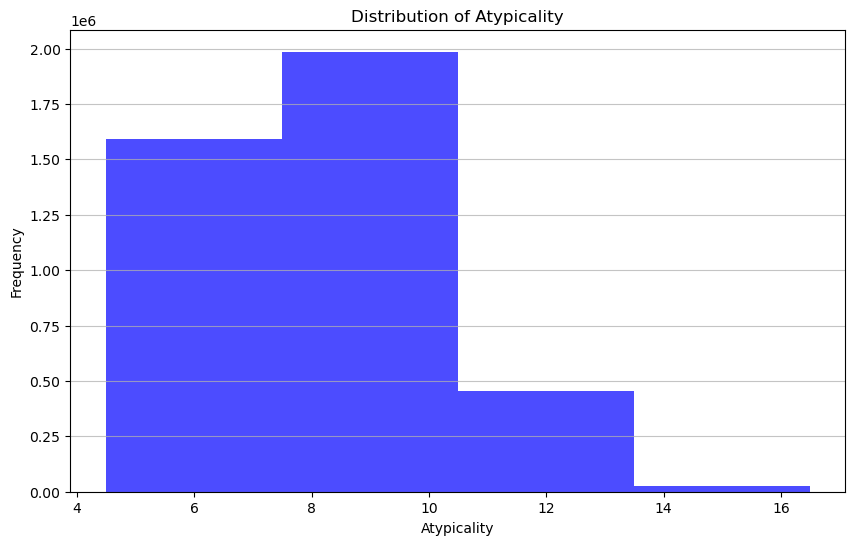

In [26]:
# Distribution of Atypicality Scores
plt.figure(figsize=(10, 6))
plt.hist(atypicality_tech_leap['atypicality_score'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Atypicality')
plt.xlabel('Atypicality')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [17]:
# Distribution of Tech Leap
atypicality_tech_leap["tech_leap"].describe(
    percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]
)

count    6.744779e+06
mean     6.776016e-01
std      2.999458e-01
min      0.000000e+00
5%       0.000000e+00
25%      5.000000e-01
50%      7.500000e-01
75%      9.166667e-01
95%      1.000000e+00
max      1.000000e+00
Name: tech_leap, dtype: float64

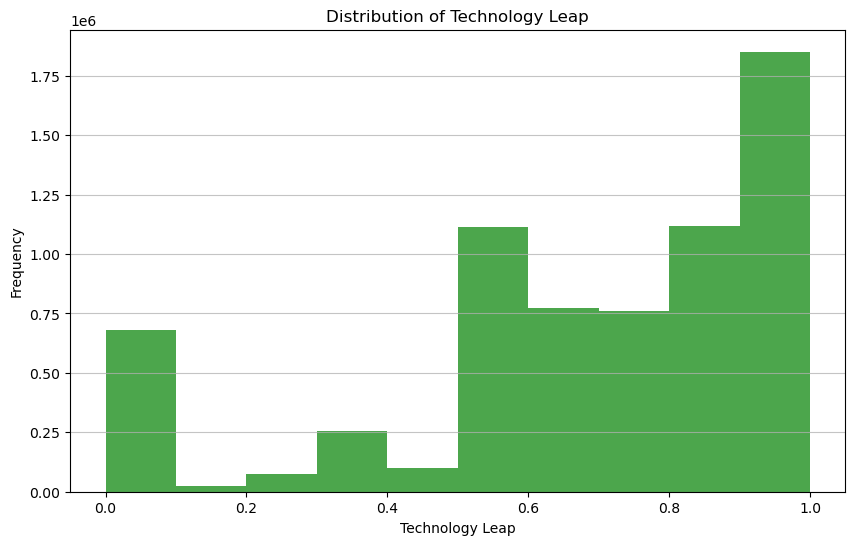

In [8]:
# Distribution of Technology Leap Scores
plt.figure(figsize=(10, 6))
plt.hist(atypicality_tech_leap['tech_leap'], bins=10, color='green', alpha=0.7)
plt.title('Distribution of Technology Leap')
plt.xlabel('Technology Leap')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [24]:
# Examine outliers in Technological Leap Score (tech_leap == 0)
atypicality_tech_leap[atypicality_tech_leap["tech_leap"] == 0]

,cpc_subclass_pairs,atypicality_score,cpc_subclasses,intersect_cpc_subclasses,union_cpc_subclasses,tech_leap
patent_id,,,,,,
10000053,"[('B41F', 'B41P')]",8.864238,"{'B41P', 'B41F'}","['B41F', 'B41P']","['B41F', 'B41P']",0.0
10000064,[],NaN,{'B41J'},['B41J'],['B41J'],0.0
10000069,[],NaN,{'B41J'},['B41J'],['B41J'],0.0
10000075,"[('B41J', 'B41M')]",8.263809,"{'B41M', 'B41J'}","['B41J', 'B41M']","['B41J', 'B41M']",0.0
10000080,"[('B41J', 'G06K')]",8.146884,"{'G06K', 'B41J'}","['B41J', 'G06K']","['B41J', 'G06K']",0.0
...,...,...,...,...,...,...
9999935,"[('B23B', 'B23D')]",10.264703,"{'B23B', 'B23D'}","['B23B', 'B23D']","['B23B', 'B23D']",0.0
9999945,"[('B23K', 'C22C')]",8.612870,"{'C22C', 'B23K'}","['C22C', 'B23K']","['C22C', 'B23K']",0.0
9999956,[],NaN,{'B24B'},['B24B'],['B24B'],0.0


In [19]:
# Distribution of Forward Citation Impact Scores
fwd_citation_impact["fwd_citation_impact_score"].describe(
    percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]
)

count    4.585905e+06
mean     3.674883e+01
std      1.574725e+02
min     -0.000000e+00
5%       0.000000e+00
25%      1.386294e+00
50%      6.870920e+00
75%      2.527974e+01
95%      1.407679e+02
max      1.102635e+04
Name: fwd_citation_impact_score, dtype: float64

In [9]:
# Examine outliers in Forward Citation Impact (fwd_citation_impact_score == 0)
fwd_citation_impact[fwd_citation_impact["fwd_citation_impact_score"] == 0]

,fwd_cited_by_patents,forward_citations,fwd_cited_cpc_subclasses,fwd_cited_cpc_subclasses_entropy,fwd_citation_impact_score
patent_id,,,,,
10000059,['11376844'],1,['B41J'],-0.0,-0.0
10000060,['11345150'],1,['B41J'],-0.0,-0.0
10000061,['11613121'],1,['B41J'],-0.0,-0.0
10000063,['11827025'],1,['B41J'],-0.0,-0.0
10000064,"['10488817', '10627780', '10928771', '10962927...",5,"['G03G', 'G03G', 'G03G']",-0.0,-0.0
...,...,...,...,...,...
RE49326,"['11992735', '12097413', '12097414', '12109463...",6,"['A63B', 'A63B', 'A63B', 'A63B', 'A63B']",-0.0,-0.0
RE49341,"['11874050', '11953252', 'RE49919']",2,"['F25C', 'F25C']",-0.0,-0.0
RE49358,['12150525'],1,['A43C'],-0.0,-0.0


In [10]:
# Find the 5 patents with the highest forward citation impact score
top_five_fwd_citation_impact = fwd_citation_impact.nlargest(5, 'fwd_citation_impact_score')
top_five_fwd_citation_impact

,fwd_cited_by_patents,forward_citations,fwd_cited_cpc_subclasses,fwd_cited_cpc_subclasses_entropy,fwd_citation_impact_score
patent_id,,,,,
6323846,"['10001817', '10001885', '10001888', '10002121...",3486,"['G06F', 'H03K', 'G06F', 'Y10T', 'G06F', 'G06F...",3.163038,11026.348777
7674650,"['10001414', '10002580', '10002656', '10002775...",4243,"['G01K', 'H10B', 'G09G', 'H10H', 'H10D', 'G02F...",2.551392,10825.556968
7061014,"['10001414', '10002580', '10002656', '10002775...",4002,"['G01K', 'H10B', 'G09G', 'H10H', 'H10D', 'G02F...",2.489460,9962.818990
6294274,"['10001414', '10002580', '10002656', '10002775...",3944,"['G01K', 'H10B', 'G09G', 'H10H', 'H10D', 'G02F...",2.525831,9961.879357
7732819,"['10001414', '10002580', '10002656', '10002775...",3974,"['G01K', 'H10B', 'G09G', 'H10H', 'H10D', 'G02F...",2.488350,9888.702838


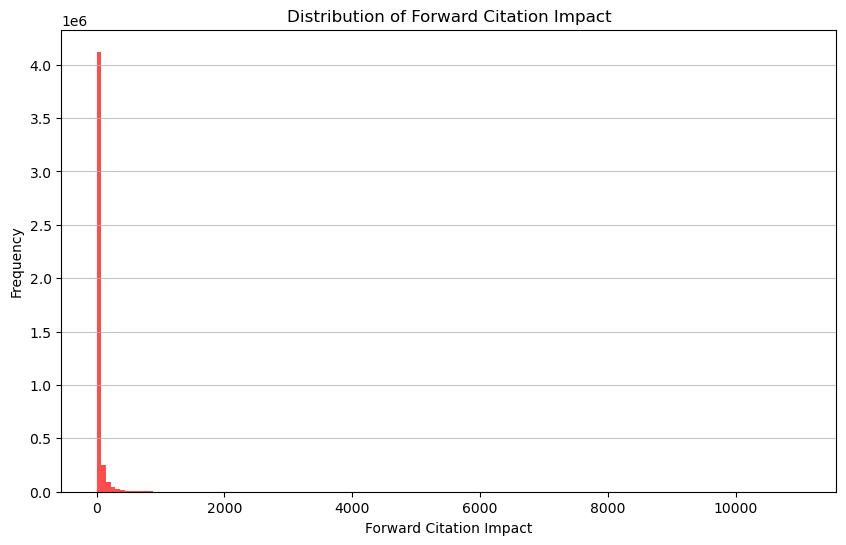

In [11]:
# Distribution of Forward Citation Impact Score
plt.figure(figsize=(10, 6))
plt.hist(fwd_citation_impact['fwd_citation_impact_score'], bins=150, color='red', alpha=0.7)
plt.title('Distribution of Forward Citation Impact')
plt.xlabel('Forward Citation Impact')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

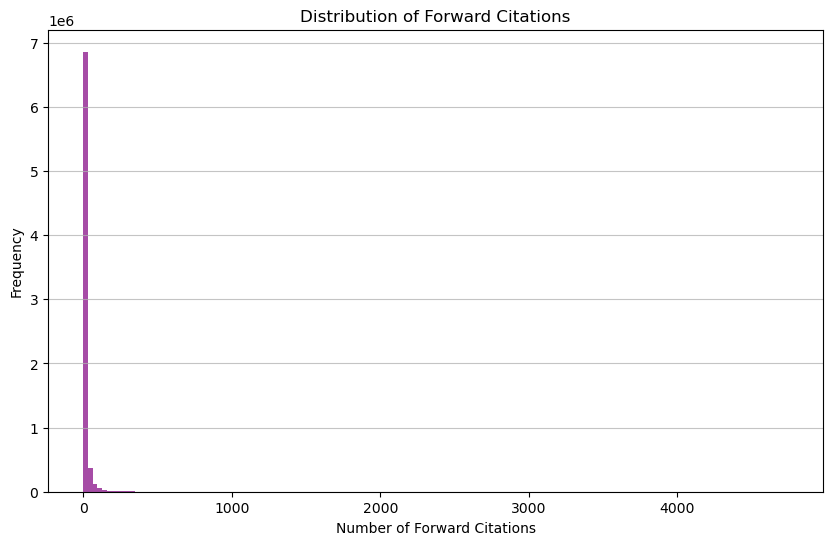

In [12]:
# Distribution of the number of forward citations
plt.figure(figsize=(10, 6))
plt.hist(fwd_citation_impact['forward_citations'], bins=150, color='purple', alpha=0.7)
plt.title('Distribution of Forward Citations')
plt.xlabel('Number of Forward Citations')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

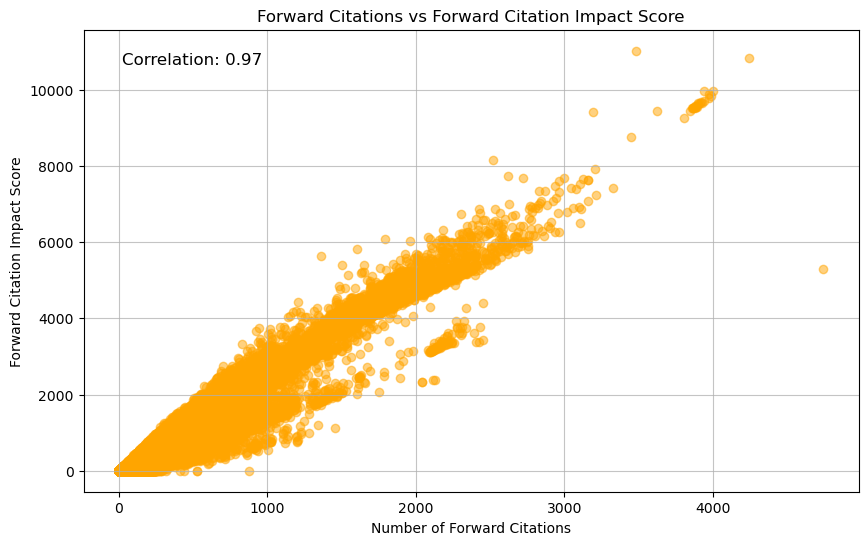

In [13]:
# Correlation between number of forward citations and forward citation impact score
correlation = fwd_citation_impact['forward_citations'].corr(fwd_citation_impact['fwd_citation_impact_score'])
plt.figure(figsize=(10, 6))
plt.scatter(fwd_citation_impact['forward_citations'], fwd_citation_impact['fwd_citation_impact_score'], alpha=0.5, color='orange')
plt.title('Forward Citations vs Forward Citation Impact Score')
plt.xlabel('Number of Forward Citations')
plt.ylabel('Forward Citation Impact Score')
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.grid(alpha=0.75)
plt.show()

In [14]:
# Merge the two measures on patent_id
patents_full = pd.merge(atypicality_tech_leap, fwd_citation_impact, on="patent_id", how="inner")
assert patents_full.shape[0] == atypicality_tech_leap.shape[0] == fwd_citation_impact.shape[0], "Data merging issue: row counts do not match."
patents_full.head()


,cpc_subclass_pairs,atypicality_score,cpc_subclasses,intersect_cpc_subclasses,union_cpc_subclasses,tech_leap,fwd_cited_by_patents,forward_citations,fwd_cited_cpc_subclasses,fwd_cited_cpc_subclasses_entropy,fwd_citation_impact_score
patent_id,,,,,,,,,,,
10000000,[],NaN,{'G01S'},['G01S'],"['Y02A', 'G01S']",0.500000,"['10753736', '10845468', '10873738', '11092690...",13,"['G01B', 'G06T', 'G01S', 'H04N', 'G01S', 'G06N...",1.399631,18.195203
10000001,"[('B29C', 'G05B')]",8.984207,"{'G05B', 'B29C'}",['B29C'],"['B29C', 'G05B']",0.500000,[],0,[],NaN,NaN
10000002,"[('B29C', 'B29D'), ('B29C', 'B29K'), ('B29C', ...",8.375340,"{'B32B', 'B29L', 'B29K', 'B60C', 'B29C', 'B29D'}","['B29C', 'B32B', 'B29K']","['B29C', 'Y10T', 'H05K', 'B29L', 'B60C', 'B29D...",0.666667,[],0,[],NaN,NaN
10000003,"[('B29C', 'B29D'), ('B29C', 'B29K'), ('B29C', ...",6.990229,"{'B29K', 'B29L', 'B29D', 'B29C'}","['B29C', 'B29L']","['B29C', 'B29D', 'B60K', 'B29K', 'B29L']",0.600000,"['10668805', '11318832']",2,"['B29C', 'B60K', 'B29C', 'B60K']",0.693147,1.386294
10000004,"[('B29C', 'B29K'), ('B29C', 'B29L'), ('B29K', ...",6.239670,"{'B29K', 'B29L', 'B29C'}","['B29C', 'B29L']","['B29C', 'B29L', 'B65D', 'B65B', 'B32B', 'B29K']",0.666667,[],0,[],NaN,NaN


In [20]:
# Calculate the 95th percentile of forward citations, this will be used to identify the top 5% of patents based on forward citations
top_5th_percentile_forward_citation_count = np.percentile(patents_full['forward_citations'], 95)
top_5th_percentile_forward_citation_count

50.0

In [21]:
# Create a new top 5% indicator based on the forward citation count
patents_full["top_5_percent_forward_citation_count"] = patents_full['forward_citations'] >= top_5th_percentile_forward_citation_count
patents_full["top_5_percent_forward_citation_count"].value_counts()

top_5_percent_forward_citation_count
False    7123956
True      383863
Name: count, dtype: int64

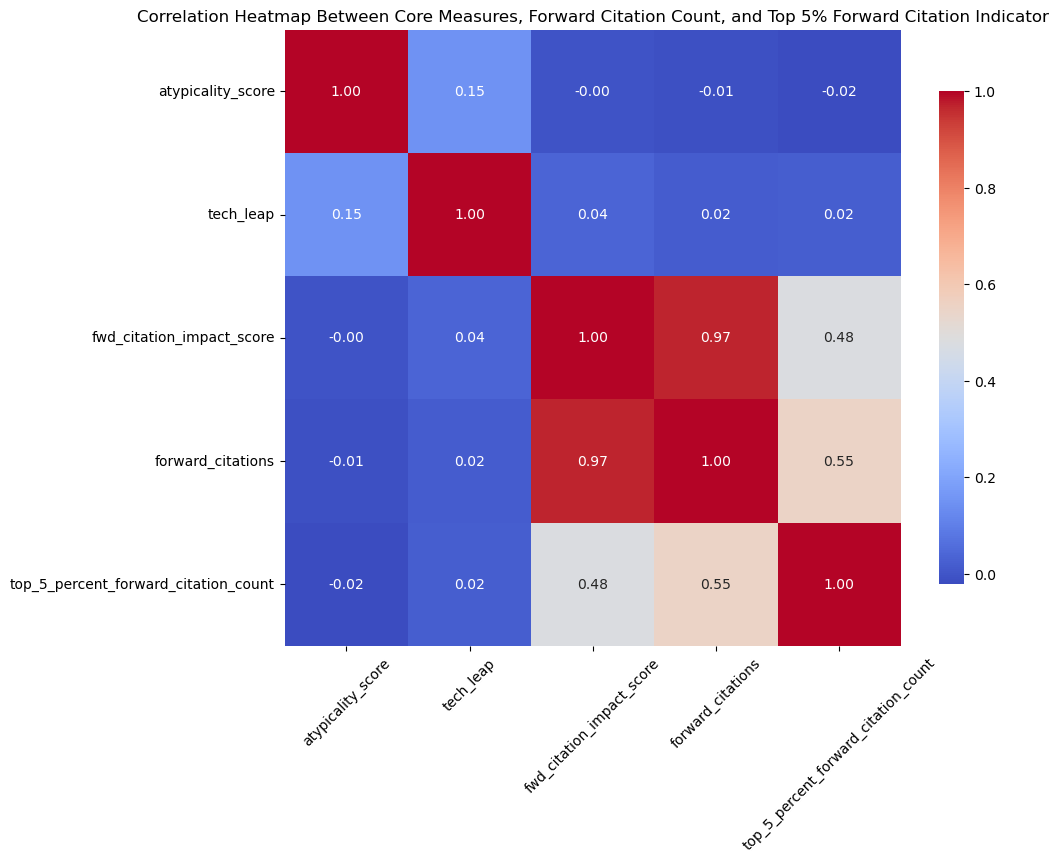

In [23]:
# Correlation heatmap between Atypicality, Technology Leap, Forward Citation Impact Score, # Forward Citations, and Top 5% Forward Citation Indicator
import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = patents_full[['atypicality_score', 'tech_leap', 'fwd_citation_impact_score', 'forward_citations', 'top_5_percent_forward_citation_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap Between Core Measures, Forward Citation Count, and Top 5% Forward Citation Indicator')
plt.xticks(rotation=45)
plt.show()